<a href="https://colab.research.google.com/github/QWERTY051310/GDSC_WP/blob/main/Assignment2_GDSCWP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.utils.data as loader
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

In [3]:
#defining transforms

train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])
])

In [4]:
#getting train and test data

train_data = torchvision.datasets.CIFAR10(root = '/content/drive/MyDrive/GDSCWP/CIFAR10/traindata',
                                          train = True,
                                          download = True,
                                          transform = train_transform)

test_data = torchvision.datasets.CIFAR10(root = '/content/drive/MyDrive/GDSCWP/CIFAR10/testdata',
                                         train = False,
                                         download = True,
                                         transform = test_transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
#loading the train and test data
batchsize = 5

train_loader = loader.DataLoader(train_data, batch_size = batchsize, shuffle = True)
test_loader = loader.DataLoader(test_data, batch_size = batchsize, shuffle = False)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

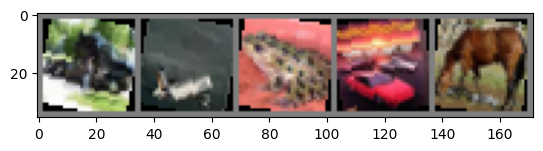

truck airplane frog  automobile horse


In [7]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batchsize)))

In [8]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(3*32*32, 1024)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(1024, 512)
        self.linear3 = nn.Linear(512, 10)  # Output for 10 classes

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = nn.functional.softmax(x, dim=1)  # Apply softmax activation
        return x


In [9]:
# Initialise the model, loss function and optimizer
model = ImageClassifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
#training
epochs = 5

for epoch in range(epochs):
  model.train()
  for i, (inputs, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

In [11]:
# Switch model to evaluation mode
model.eval()

# Initialize variables to track performance
total_samples = 0
correct_predictions = 0

# Disable gradient computations
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)

        # Get the predicted class (the one with the highest probability)
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct counts
        total_samples += targets.size(0)
        correct_predictions += (predicted == targets).sum().item()

# Calculate accuracy
accuracy = 100 * correct_predictions / total_samples
print(f'Accuracy of the model on the test data: {accuracy:.2f}%')

Accuracy of the model on the test data: 41.74%
